In [1]:
import os
import warnings
warnings.filterwarnings("ignore")


In [2]:
os.getcwd()

'/Users/Arunabh/Downloads/data'

In [3]:
ls

AMZN.csv               NOAA_TAVG.csv          multiTimeline.csv*
AirPassengers.csv      Sprint_Intraday.txt    sample_data.xlsx*
Book2.xlsx*            TS-1.ipynb             sample_submission.csv*
CME_HO1.csv            UFO.csv                test.csv*
CME_NG1.csv            Untitled.ipynb         train.csv*
DJI.csv                Untitled1.ipynb        ts2.ipynb
HRB.csv                Untitled2.ipynb
MSFT.csv               Untitled3.ipynb


In [4]:
import pandas as pd

In [5]:
df3 = pd.read_excel("Book2.xlsx")

In [6]:
df3.head(2)

,ID,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click
0,IDsrk7SoW,2017-01-14 09:42:09,4709696.0,887235,17714,20301556,e,Firefox,NaN,0
1,IDmMSxHur,2017-01-18 17:50:53,5189467.0,178235,21407,9434818,b,Mozilla Firefox,Desktop,0


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def clean(df):
    df = df.dropna()
    df["hour_time"] = df["datetime"].dt.hour
    df['time_slice'] = pd.cut(df["hour_time"], bins=[0, 6, 12, 18, 23], 
                              labels=['night','morning','afternoon','evening'])
    df = df.drop(["datetime", "hour_time"],1)
    df['browserid']= df['browserid'].str.lower()
    df['browserid'] = df['browserid'].str.replace(' ', '')
    df['browserid'].replace('mozillafirefox', 'mozilla', inplace=True)
    df['browserid'].replace('firefox', 'mozilla', inplace=True)
    df['browserid'].replace('internet explorer', 'ie', inplace=True)
    df['browserid'].replace('internetexplorer', 'ie', inplace=True)
    df['browserid'].replace('ie', 'edge', inplace=True)
    df['browserid'].replace('googlechrome', 'chrome', inplace=True)
    df = df.dropna()
    df["browserid"] = le.fit_transform(df["browserid"])
    df["devid"] = le.fit_transform(df["devid"])
    df["time_slice"] = le.fit_transform(df["time_slice"])
    df["countrycode"] = le.fit_transform(df["countrycode"])
    df = df.drop(["ID"],1)
    return (df)

In [8]:
ok = clean(df3)

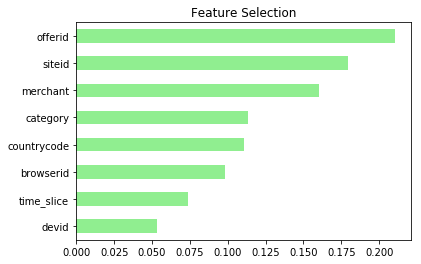

In [10]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
X = ok.drop(["click"],1)
y = ok["click"]


rf = RandomForestClassifier(n_estimators=300, random_state=2)
rf.fit(X, y)

importances = pd.Series(data=rf.feature_importances_, index = X.columns)
importances_sorted = importances.sort_values()

importances_sorted.plot(kind='barh', color="lightgreen")
plt.title('Feature Selection')
plt.show()